In [1]:
import pandas as pd
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

In [2]:
df = pd.read_feather("../../data/interim/pagos.feather")

In [3]:
df.head(5)

,COD_COBRO,COD_SITUACION,FECHA_VTO,FEC_PAGO,MONTO_PAGO,NUM_SECU_POL
0,CC,CT,2018-11,2018-11,11.28,37339992
1,CC,CT,2018-11,2018-11,11.28,120889992
2,CC,CT,2018-11,2018-11,22.56,76459992
3,CC,CT,2018-11,2018-11,429.36,34569992
4,CC,CT,2018-11,2018-11,90.24,131299992


In [4]:
df_id_pol = pd.read_feather("../../data/interim/poliza_x_cliente.feather")

In [5]:
len(set(df_id_pol["NUM_SECU_POL"].unique()).intersection(set(df["NUM_SECU_POL"].unique()))) / len(df["NUM_SECU_POL"].unique())

0.6691448635003047

In [6]:
df["NUM_SECU_POL"].nunique()

12579442

Usamos un inner join para unirlas ya que no nos sirven los campos que no tengan cif_id

In [7]:
df = pd.merge(df, df_id_pol, on='NUM_SECU_POL', how='inner')

**Revisamos los pagos**

In [8]:
df.nunique()

COD_COBRO              6
COD_SITUACION          4
FECHA_VTO             25
FEC_PAGO              67
MONTO_PAGO        316625
NUM_SECU_POL     8417469
CIF_ID            872096
dtype: int64

Removemos pagos que esten por fuera del periodo a analizar

In [9]:
df = df.loc[~df["FECHA_VTO"].str.contains("20[12][067]")]

In [10]:
df = df.loc[~df["FECHA_VTO"].str.contains("2018-0")]

In [11]:
df = df.loc[~df["FECHA_VTO"].str.contains("2018-10")]

In [12]:
df = df.loc[~df["FECHA_VTO"].str.contains("2019-12")]

In [13]:
df["FECHA_VTO"].value_counts().sort_index().plot.bar()

Revisamos algunas estadisticas de nuevo

In [14]:
df.nunique()

COD_COBRO              6
COD_SITUACION          4
FECHA_VTO             13
FEC_PAGO              67
MONTO_PAGO        314202
NUM_SECU_POL     8364413
CIF_ID            870826
dtype: int64

### Generamos algunas variables adicionales

#### Diferencia entre fecha de pago y vencimiento
- [PAGO - VENCIMIENTO]

In [15]:
def lookup(s):
    """
    This is an extremely fast approach to datetime parsing.
    For large data, the same dates are often repeated. Rather than
    re-parse these, we store all unique dates, parse them, and
    use a lookup to convert all dates.
    """
    dates = {date:pd.to_datetime(date) for date in s.unique()}
    return s.map(dates)

df["FECHA_VTO"] = lookup(df["FECHA_VTO"])
df["FEC_PAGO"] = lookup(df["FEC_PAGO"])

In [16]:
import numpy as np
df["demora_pago"] = ((df["FEC_PAGO"] - df["FECHA_VTO"])/np.timedelta64(1, 'M')).astype("float")

In [17]:
df[["demora_pago","FECHA_VTO","FEC_PAGO"]] 

,demora_pago,FECHA_VTO,FEC_PAGO
0,0.000000,2018-11-01,2018-11-01
1,0.985647,2018-11-01,2018-12-01
2,0.000000,2018-12-01,2018-12-01
3,0.000000,2018-12-01,2018-12-01
4,0.000000,2018-11-01,2018-11-01
5,1.018501,2019-01-01,2019-02-01
6,-1.018501,2019-01-01,2018-12-01
7,0.000000,2018-12-01,2018-12-01
8,-0.985647,2018-12-01,2018-11-01
9,-3.022649,2019-02-01,2018-11-01


In [18]:
df["demora_pago"].value_counts()

 0.000000     6352938
-1.018501      608179
 1.018501      606444
 0.985647      388358
-0.985647      306667
 0.919937      109707
 2.004148       96866
-0.919937       95649
-2.004148       23026
 1.938438       15017
 3.022649       13504
 2.037003       11363
-2.037003        8830
-3.022649        5320
-4.008296        4079
 3.942586        3377
-1.938438        3019
 2.989794        2406
 2.956940        2350
 4.961087        1976
 4.008296        1840
 2.924085        1581
-5.026797        1508
-3.942586        1182
-2.956940        1157
-4.041151        1069
-2.989794         953
 5.026797         861
 5.979589         799
-2.924085         759
 4.041151         667
-4.961087         538
-4.928233         310
-27.006715        304
-22.965564        301
 7.030945         271
 6.045299         242
 6.965235         237
 5.946734         235
 6.012444         235
-3.975441         213
 3.975441         206
-17.938767        199
 4.928233         189
-45.996838        176
-6.965235 

In [19]:
print(df["demora_pago"].min(),df["demora_pago"].max()) 

-57.06893365366845 11.992032690609664


#### Revisamos COD_COBRO

In [20]:
df["COD_COBRO"].value_counts(dropna=False)

TM    3464244
PP    2508856
CC    1720368
BA    1122647
TA      35693
SJ       9515
Name: COD_COBRO, dtype: int64

Según el diccionario de datos TM/TA = Tarjeta así que los unificamos en TA

In [21]:
df.loc[df["COD_COBRO"]=="TM","COD_COBRO"] = "TA"

In [22]:
df["COD_COBRO"].value_counts(dropna=False)

TA    3499937
PP    2508856
CC    1720368
BA    1122647
SJ       9515
Name: COD_COBRO, dtype: int64

#### Creamos la variable periodo en lugar de fecha_vto para que coincida con el resto de las tablas

In [23]:
new_data = {fecha:pd.to_datetime(fecha).strftime('%Y-%m') for fecha in df["FECHA_VTO"].unique()}
new_data

{numpy.datetime64('2018-11-01T00:00:00.000000000'): '2018-11',
 numpy.datetime64('2018-12-01T00:00:00.000000000'): '2018-12',
 numpy.datetime64('2019-01-01T00:00:00.000000000'): '2019-01',
 numpy.datetime64('2019-02-01T00:00:00.000000000'): '2019-02',
 numpy.datetime64('2019-03-01T00:00:00.000000000'): '2019-03',
 numpy.datetime64('2019-04-01T00:00:00.000000000'): '2019-04',
 numpy.datetime64('2019-05-01T00:00:00.000000000'): '2019-05',
 numpy.datetime64('2019-06-01T00:00:00.000000000'): '2019-06',
 numpy.datetime64('2019-07-01T00:00:00.000000000'): '2019-07',
 numpy.datetime64('2019-10-01T00:00:00.000000000'): '2019-10',
 numpy.datetime64('2019-09-01T00:00:00.000000000'): '2019-09',
 numpy.datetime64('2019-11-01T00:00:00.000000000'): '2019-11',
 numpy.datetime64('2019-08-01T00:00:00.000000000'): '2019-08'}

In [24]:
df["FECHA_VTO"] = df["FECHA_VTO"].map(new_data)

In [25]:
data = {fecha:i + 1 for i,fecha in enumerate(sorted(df["FECHA_VTO"].unique()))}
data

{'2018-11': 1,
 '2018-12': 2,
 '2019-01': 3,
 '2019-02': 4,
 '2019-03': 5,
 '2019-04': 6,
 '2019-05': 7,
 '2019-06': 8,
 '2019-07': 9,
 '2019-08': 10,
 '2019-09': 11,
 '2019-10': 12,
 '2019-11': 13}

In [26]:
df["periodo"] = df["FECHA_VTO"].map(data)

In [27]:
df.head()

,COD_COBRO,COD_SITUACION,FECHA_VTO,FEC_PAGO,MONTO_PAGO,NUM_SECU_POL,CIF_ID,demora_pago,periodo
0,CC,CT,2018-11,2018-11-01,-1612.0,1868627709999,3215800.0,0.000000,1
1,CC,CT,2018-11,2018-12-01,1612.0,1868627709999,3215800.0,0.985647,1
2,CC,CT,2018-12,2018-12-01,-1612.0,1868627709999,3215800.0,0.000000,2
3,BA,CT,2018-12,2018-12-01,1568.0,1884108709999,19483130.0,0.000000,2
4,PP,CT,2018-11,2018-11-01,2745.5,1886814139999,21755113.0,0.000000,1


#### Empezamos a probar pivots por CIF_ID

In [28]:
df = df.rename(columns={"diferencia_vto_pago": "demora_pago"})

In [29]:
to_pivot = df[["CIF_ID","demora_pago","periodo","COD_COBRO","COD_SITUACION","MONTO_PAGO"]]

In [30]:
df_pagos_datediff = to_pivot.pivot_table(index=["CIF_ID"], columns=["periodo"], values=["demora_pago","MONTO_PAGO"], aggfunc="mean")

In [31]:
df_pagos_datediff.head()

MONTO_PAGO                                                          \
periodo         1       2       3       4       5       6       7       8    
CIF_ID                                                                       
571.0          NaN   845.0   845.0   845.0   845.0   845.0   845.0  1484.0   
573.0          NaN  1396.0  1396.0  1396.0  1497.0  1497.0  1497.0  1542.0   
1009.0      1484.0  1484.0  1484.0  1484.0  1484.0  1484.0  1729.0  1729.0   
1075.0         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1103.0         NaN     NaN  3255.0  3255.0  3255.0  4368.0  4368.0  4368.0   

                                                     demora_pago            \
periodo      9       10      11           12      13          1    2    3    
CIF_ID                                                                       
571.0    1484.0  1484.0  1484.0  1484.000000  1484.0         NaN  0.0  0.0   
573.0    1542.0  1542.0  1746.0  1746.000000  1746.0         NaN  0.0  0.0   
1009.0   1729.0  1965.0  1965.0  1965.000000  1974.0         0.0  0.0  0.0   
1075.0      NaN  1960.0  1960.0   653.333333  2127.0         NaN  NaN  NaN   
1103.0   1926.0  1926.0  1926.0  2197.000000  2197.0         NaN  NaN  0.0   

                                                                          
periodo   4    5    6    7    8    9         10        11        12   13  
CIF_ID                                                                    
571.0    0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  
573.0    0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  
1009.0   0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  
1075.0   NaN  NaN  NaN  NaN  NaN  NaN  1.018501  0.985647 -0.996598  NaN  
1103.0   0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0

In [32]:
df_cods = to_pivot.pivot_table(index=["CIF_ID"], columns=["periodo","COD_SITUACION"], aggfunc="size")
df_cods.head()

periodo        1            2            3                4                5   \
COD_SITUACION  AM   CT  EP  AM   CT  EP  AM   CT  EP  PP  AM   CT  EP  PP  AM   
CIF_ID                                                                          
571.0         NaN  NaN NaN NaN  1.0 NaN NaN  1.0 NaN NaN NaN  1.0 NaN NaN NaN   
573.0         NaN  NaN NaN NaN  1.0 NaN NaN  1.0 NaN NaN NaN  1.0 NaN NaN NaN   
1009.0        NaN  1.0 NaN NaN  1.0 NaN NaN  1.0 NaN NaN NaN  1.0 NaN NaN NaN   
1075.0        NaN  NaN NaN NaN  NaN NaN NaN  NaN NaN NaN NaN  NaN NaN NaN NaN   
1103.0        NaN  NaN NaN NaN  NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN NaN NaN   

periodo                     6                7                8                \
COD_SITUACION   CT  EP  PP  AM   CT  EP  PP  AM   CT  EP  PP  AM   CT  EP  PP   
CIF_ID                                                                          
571.0          1.0 NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN NaN   
573.0          1.0 NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN NaN   
1009.0         1.0 NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN NaN   
1075.0         NaN NaN NaN NaN  NaN NaN NaN NaN  NaN NaN NaN NaN  NaN NaN NaN   
1103.0         1.0 NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN NaN   

periodo        9                10               11               12           \
COD_SITUACION  AM   CT  EP  PP  AM   CT  EP  PP  AM   CT  EP  PP  AM   CT  EP   
CIF_ID                                                                          
571.0         NaN  1.0 NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN   
573.0         NaN  1.0 NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN   
1009.0        NaN  1.0 NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN   
1075.0        NaN  NaN NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN NaN NaN  3.0 NaN   
1103.0        NaN  1.0 NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN NaN NaN  1.0 NaN   

periodo            13                
COD_SITUACION  PP  AM   CT   EP  PP  
CIF_ID                               
571.0         NaN NaN  1.0  NaN NaN  
573.0         NaN NaN  1.0  NaN NaN  
1009.0        NaN NaN  1.0  NaN NaN  
1075.0        NaN NaN  NaN  1.0 NaN  
1103.0        NaN NaN  1.0  NaN NaN

In [33]:
df_codc = to_pivot.pivot_table(index=["CIF_ID"], columns=["periodo","COD_COBRO"], aggfunc="size")
df_codc.head()

periodo    1                    2                     3                     \
COD_COBRO  BA   CC  PP  SJ  TA  BA   CC  PP  SJ   TA  BA   CC  PP  SJ   TA   
CIF_ID                                                                       
571.0     NaN  NaN NaN NaN NaN NaN  NaN NaN NaN  1.0 NaN  NaN NaN NaN  1.0   
573.0     NaN  NaN NaN NaN NaN NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN   
1009.0    NaN  1.0 NaN NaN NaN NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN   
1075.0    NaN  NaN NaN NaN NaN NaN  NaN NaN NaN  NaN NaN  NaN NaN NaN  NaN   
1103.0    NaN  NaN NaN NaN NaN NaN  NaN NaN NaN  NaN NaN  1.0 NaN NaN  NaN   

periodo    4                     5                     6                     \
COD_COBRO  BA   CC  PP  SJ   TA  BA   CC  PP  SJ   TA  BA   CC  PP  SJ   TA   
CIF_ID                                                                        
571.0     NaN  NaN NaN NaN  1.0 NaN  NaN NaN NaN  1.0 NaN  NaN NaN NaN  1.0   
573.0     NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN   
1009.0    NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN   
1075.0    NaN  NaN NaN NaN  NaN NaN  NaN NaN NaN  NaN NaN  NaN NaN NaN  NaN   
1103.0    NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN   

periodo    7                     8                     9                     \
COD_COBRO  BA   CC  PP  SJ   TA  BA   CC  PP  SJ   TA  BA   CC  PP  SJ   TA   
CIF_ID                                                                        
571.0     NaN  NaN NaN NaN  1.0 NaN  NaN NaN NaN  1.0 NaN  NaN NaN NaN  1.0   
573.0     NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN   
1009.0    NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN   
1075.0    NaN  NaN NaN NaN  NaN NaN  NaN NaN NaN  NaN NaN  NaN NaN NaN  NaN   
1103.0    NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN NaN  1.0 NaN NaN  NaN   

periodo     10                     11                     12               \
COD_COBRO   BA   CC  PP  SJ   TA   BA   CC  PP  SJ   TA   BA   CC  PP  SJ   
CIF_ID                                                                      
571.0      NaN  NaN NaN NaN  1.0  NaN  NaN NaN NaN  1.0  NaN  NaN NaN NaN   
573.0      NaN  1.0 NaN NaN  NaN  NaN  1.0 NaN NaN  NaN  NaN  1.0 NaN NaN   
1009.0     NaN  1.0 NaN NaN  NaN  NaN  1.0 NaN NaN  NaN  NaN  1.0 NaN NaN   
1075.0     1.0  NaN NaN NaN  NaN  1.0  NaN NaN NaN  NaN  2.0  1.0 NaN NaN   
1103.0     NaN  1.0 NaN NaN  NaN  NaN  1.0 NaN NaN  NaN  NaN  1.0 NaN NaN   

periodo          13                    
COD_COBRO   TA   BA   CC  PP  SJ   TA  
CIF_ID                                 
571.0      1.0  NaN  NaN NaN NaN  1.0  
573.0      NaN  NaN  1.0 NaN NaN  NaN  
1009.0     NaN  NaN  1.0 NaN NaN  NaN  
1075.0     NaN  1.0  NaN NaN NaN  NaN  
1103.0     NaN  NaN  1.0 NaN NaN  NaN

*Formateamos los DataFrames para unirlos en uno solo*

In [34]:
df_pagos_datediff = pd.DataFrame(df_pagos_datediff.to_records())
df_pagos_datediff.head()

,CIF_ID,"('MONTO_PAGO', 1)","('MONTO_PAGO', 2)","('MONTO_PAGO', 3)","('MONTO_PAGO', 4)","('MONTO_PAGO', 5)","('MONTO_PAGO', 6)","('MONTO_PAGO', 7)","('MONTO_PAGO', 8)","('MONTO_PAGO', 9)","('MONTO_PAGO', 10)","('MONTO_PAGO', 11)","('MONTO_PAGO', 12)","('MONTO_PAGO', 13)","('demora_pago', 1)","('demora_pago', 2)","('demora_pago', 3)","('demora_pago', 4)","('demora_pago', 5)","('demora_pago', 6)","('demora_pago', 7)","('demora_pago', 8)","('demora_pago', 9)","('demora_pago', 10)","('demora_pago', 11)","('demora_pago', 12)","('demora_pago', 13)"
0,571.0,NaN,845.0,845.0,845.0,845.0,845.0,845.0,1484.0,1484.0,1484.0,1484.0,1484.000000,1484.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,573.0,NaN,1396.0,1396.0,1396.0,1497.0,1497.0,1497.0,1542.0,1542.0,1542.0,1746.0,1746.000000,1746.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
2,1009.0,1484.0,1484.0,1484.0,1484.0,1484.0,1484.0,1729.0,1729.0,1729.0,1965.0,1965.0,1965.000000,1974.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
3,1075.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1960.0,1960.0,653.333333,2127.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.018501,0.985647,-0.996598,NaN
4,1103.0,NaN,NaN,3255.0,3255.0,3255.0,4368.0,4368.0,4368.0,1926.0,1926.0,1926.0,2197.000000,2197.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0


In [35]:
df_cods = pd.DataFrame(df_cods.to_records())
df_cods.head()

,CIF_ID,"(1, 'AM')","(1, 'CT')","(1, 'EP')","(2, 'AM')","(2, 'CT')","(2, 'EP')","(3, 'AM')","(3, 'CT')","(3, 'EP')","(3, 'PP')","(4, 'AM')","(4, 'CT')","(4, 'EP')","(4, 'PP')","(5, 'AM')","(5, 'CT')","(5, 'EP')","(5, 'PP')","(6, 'AM')","(6, 'CT')","(6, 'EP')","(6, 'PP')","(7, 'AM')","(7, 'CT')","(7, 'EP')","(7, 'PP')","(8, 'AM')","(8, 'CT')","(8, 'EP')","(8, 'PP')","(9, 'AM')","(9, 'CT')","(9, 'EP')","(9, 'PP')","(10, 'AM')","(10, 'CT')","(10, 'EP')","(10, 'PP')","(11, 'AM')","(11, 'CT')","(11, 'EP')","(11, 'PP')","(12, 'AM')","(12, 'CT')","(12, 'EP')","(12, 'PP')","(13, 'AM')","(13, 'CT')","(13, 'EP')","(13, 'PP')"
0,571.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
1,573.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
2,1009.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
3,1075.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,1.0,NaN
4,1103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN


In [36]:
df_codc = pd.DataFrame(df_codc.to_records())
df_codc.head()

,CIF_ID,"(1, 'BA')","(1, 'CC')","(1, 'PP')","(1, 'SJ')","(1, 'TA')","(2, 'BA')","(2, 'CC')","(2, 'PP')","(2, 'SJ')","(2, 'TA')","(3, 'BA')","(3, 'CC')","(3, 'PP')","(3, 'SJ')","(3, 'TA')","(4, 'BA')","(4, 'CC')","(4, 'PP')","(4, 'SJ')","(4, 'TA')","(5, 'BA')","(5, 'CC')","(5, 'PP')","(5, 'SJ')","(5, 'TA')","(6, 'BA')","(6, 'CC')","(6, 'PP')","(6, 'SJ')","(6, 'TA')","(7, 'BA')","(7, 'CC')","(7, 'PP')","(7, 'SJ')","(7, 'TA')","(8, 'BA')","(8, 'CC')","(8, 'PP')","(8, 'SJ')","(8, 'TA')","(9, 'BA')","(9, 'CC')","(9, 'PP')","(9, 'SJ')","(9, 'TA')","(10, 'BA')","(10, 'CC')","(10, 'PP')","(10, 'SJ')","(10, 'TA')","(11, 'BA')","(11, 'CC')","(11, 'PP')","(11, 'SJ')","(11, 'TA')","(12, 'BA')","(12, 'CC')","(12, 'PP')","(12, 'SJ')","(12, 'TA')","(13, 'BA')","(13, 'CC')","(13, 'PP')","(13, 'SJ')","(13, 'TA')"
0,571.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
1,573.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,1009.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,1075.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,1103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [37]:
len(df_codc) == len(df_cods) == len(df_pagos_datediff)

True

In [38]:
len(df_cods)

870826

### Renombramos las columnas

In [39]:
df_codc.columns

Index(['CIF_ID', '(1, 'BA')', '(1, 'CC')', '(1, 'PP')', '(1, 'SJ')',
       '(1, 'TA')', '(2, 'BA')', '(2, 'CC')', '(2, 'PP')', '(2, 'SJ')',
       '(2, 'TA')', '(3, 'BA')', '(3, 'CC')', '(3, 'PP')', '(3, 'SJ')',
       '(3, 'TA')', '(4, 'BA')', '(4, 'CC')', '(4, 'PP')', '(4, 'SJ')',
       '(4, 'TA')', '(5, 'BA')', '(5, 'CC')', '(5, 'PP')', '(5, 'SJ')',
       '(5, 'TA')', '(6, 'BA')', '(6, 'CC')', '(6, 'PP')', '(6, 'SJ')',
       '(6, 'TA')', '(7, 'BA')', '(7, 'CC')', '(7, 'PP')', '(7, 'SJ')',
       '(7, 'TA')', '(8, 'BA')', '(8, 'CC')', '(8, 'PP')', '(8, 'SJ')',
       '(8, 'TA')', '(9, 'BA')', '(9, 'CC')', '(9, 'PP')', '(9, 'SJ')',
       '(9, 'TA')', '(10, 'BA')', '(10, 'CC')', '(10, 'PP')', '(10, 'SJ')',
       '(10, 'TA')', '(11, 'BA')', '(11, 'CC')', '(11, 'PP')', '(11, 'SJ')',
       '(11, 'TA')', '(12, 'BA')', '(12, 'CC')', '(12, 'PP')', '(12, 'SJ')',
       '(12, 'TA')', '(13, 'BA')', '(13, 'CC')', '(13, 'PP')', '(13, 'SJ')',
       '(13, 'TA')'],
      dtype='object')

In [40]:
df_codc = df_codc.rename(columns=lambda x: x.replace("(","").replace(")","").replace(", ","_COBRO_").replace("'",""))

In [41]:
df_codc.columns

Index(['CIF_ID', '1_COBRO_BA', '1_COBRO_CC', '1_COBRO_PP', '1_COBRO_SJ',
       '1_COBRO_TA', '2_COBRO_BA', '2_COBRO_CC', '2_COBRO_PP', '2_COBRO_SJ',
       '2_COBRO_TA', '3_COBRO_BA', '3_COBRO_CC', '3_COBRO_PP', '3_COBRO_SJ',
       '3_COBRO_TA', '4_COBRO_BA', '4_COBRO_CC', '4_COBRO_PP', '4_COBRO_SJ',
       '4_COBRO_TA', '5_COBRO_BA', '5_COBRO_CC', '5_COBRO_PP', '5_COBRO_SJ',
       '5_COBRO_TA', '6_COBRO_BA', '6_COBRO_CC', '6_COBRO_PP', '6_COBRO_SJ',
       '6_COBRO_TA', '7_COBRO_BA', '7_COBRO_CC', '7_COBRO_PP', '7_COBRO_SJ',
       '7_COBRO_TA', '8_COBRO_BA', '8_COBRO_CC', '8_COBRO_PP', '8_COBRO_SJ',
       '8_COBRO_TA', '9_COBRO_BA', '9_COBRO_CC', '9_COBRO_PP', '9_COBRO_SJ',
       '9_COBRO_TA', '10_COBRO_BA', '10_COBRO_CC', '10_COBRO_PP',
       '10_COBRO_SJ', '10_COBRO_TA', '11_COBRO_BA', '11_COBRO_CC',
       '11_COBRO_PP', '11_COBRO_SJ', '11_COBRO_TA', '12_COBRO_BA',
       '12_COBRO_CC', '12_COBRO_PP', '12_COBRO_SJ', '12_COBRO_TA',
       '13_COBRO_BA', '13_COBRO_CC', '13_COB

In [42]:
df_cods.columns

Index(['CIF_ID', '(1, 'AM')', '(1, 'CT')', '(1, 'EP')', '(2, 'AM')',
       '(2, 'CT')', '(2, 'EP')', '(3, 'AM')', '(3, 'CT')', '(3, 'EP')',
       '(3, 'PP')', '(4, 'AM')', '(4, 'CT')', '(4, 'EP')', '(4, 'PP')',
       '(5, 'AM')', '(5, 'CT')', '(5, 'EP')', '(5, 'PP')', '(6, 'AM')',
       '(6, 'CT')', '(6, 'EP')', '(6, 'PP')', '(7, 'AM')', '(7, 'CT')',
       '(7, 'EP')', '(7, 'PP')', '(8, 'AM')', '(8, 'CT')', '(8, 'EP')',
       '(8, 'PP')', '(9, 'AM')', '(9, 'CT')', '(9, 'EP')', '(9, 'PP')',
       '(10, 'AM')', '(10, 'CT')', '(10, 'EP')', '(10, 'PP')', '(11, 'AM')',
       '(11, 'CT')', '(11, 'EP')', '(11, 'PP')', '(12, 'AM')', '(12, 'CT')',
       '(12, 'EP')', '(12, 'PP')', '(13, 'AM')', '(13, 'CT')', '(13, 'EP')',
       '(13, 'PP')'],
      dtype='object')

In [43]:
df_cods = df_cods.rename(columns=lambda x: x.replace("(","").replace(")","").replace(", ","_SITUACION_").replace("'",""))

In [44]:
df_cods.columns

Index(['CIF_ID', '1_SITUACION_AM', '1_SITUACION_CT', '1_SITUACION_EP',
       '2_SITUACION_AM', '2_SITUACION_CT', '2_SITUACION_EP', '3_SITUACION_AM',
       '3_SITUACION_CT', '3_SITUACION_EP', '3_SITUACION_PP', '4_SITUACION_AM',
       '4_SITUACION_CT', '4_SITUACION_EP', '4_SITUACION_PP', '5_SITUACION_AM',
       '5_SITUACION_CT', '5_SITUACION_EP', '5_SITUACION_PP', '6_SITUACION_AM',
       '6_SITUACION_CT', '6_SITUACION_EP', '6_SITUACION_PP', '7_SITUACION_AM',
       '7_SITUACION_CT', '7_SITUACION_EP', '7_SITUACION_PP', '8_SITUACION_AM',
       '8_SITUACION_CT', '8_SITUACION_EP', '8_SITUACION_PP', '9_SITUACION_AM',
       '9_SITUACION_CT', '9_SITUACION_EP', '9_SITUACION_PP', '10_SITUACION_AM',
       '10_SITUACION_CT', '10_SITUACION_EP', '10_SITUACION_PP',
       '11_SITUACION_AM', '11_SITUACION_CT', '11_SITUACION_EP',
       '11_SITUACION_PP', '12_SITUACION_AM', '12_SITUACION_CT',
       '12_SITUACION_EP', '12_SITUACION_PP', '13_SITUACION_AM',
       '13_SITUACION_CT', '13_SITUACION_

In [45]:
df_pagos_datediff.columns

Index(['CIF_ID', '('MONTO_PAGO', 1)', '('MONTO_PAGO', 2)', '('MONTO_PAGO', 3)',
       '('MONTO_PAGO', 4)', '('MONTO_PAGO', 5)', '('MONTO_PAGO', 6)',
       '('MONTO_PAGO', 7)', '('MONTO_PAGO', 8)', '('MONTO_PAGO', 9)',
       '('MONTO_PAGO', 10)', '('MONTO_PAGO', 11)', '('MONTO_PAGO', 12)',
       '('MONTO_PAGO', 13)', '('demora_pago', 1)', '('demora_pago', 2)',
       '('demora_pago', 3)', '('demora_pago', 4)', '('demora_pago', 5)',
       '('demora_pago', 6)', '('demora_pago', 7)', '('demora_pago', 8)',
       '('demora_pago', 9)', '('demora_pago', 10)', '('demora_pago', 11)',
       '('demora_pago', 12)', '('demora_pago', 13)'],
      dtype='object')

In [46]:
df_pagos_datediff = df_pagos_datediff.rename(columns=lambda x: x.replace("(","").replace(")","").replace(", ","_").replace("'",""))

In [47]:
df_pagos_datediff.columns

Index(['CIF_ID', 'MONTO_PAGO_1', 'MONTO_PAGO_2', 'MONTO_PAGO_3',
       'MONTO_PAGO_4', 'MONTO_PAGO_5', 'MONTO_PAGO_6', 'MONTO_PAGO_7',
       'MONTO_PAGO_8', 'MONTO_PAGO_9', 'MONTO_PAGO_10', 'MONTO_PAGO_11',
       'MONTO_PAGO_12', 'MONTO_PAGO_13', 'demora_pago_1', 'demora_pago_2',
       'demora_pago_3', 'demora_pago_4', 'demora_pago_5', 'demora_pago_6',
       'demora_pago_7', 'demora_pago_8', 'demora_pago_9', 'demora_pago_10',
       'demora_pago_11', 'demora_pago_12', 'demora_pago_13'],
      dtype='object')

### Ahora unimos los dataframes

In [48]:
del df
del to_pivot

In [49]:
data = [df_cods,df_codc,df_pagos_datediff]
from functools import reduce

In [50]:
df = reduce(lambda  left,right: pd.merge(left, right, on=['CIF_ID'], how='outer'), data)
len(df)

870826

In [51]:
sum([len(df.columns) for df in data])

144

In [52]:
len(df.columns)

142

In [53]:
len(set(df.columns))

142

In [54]:
df["CIF_ID"].nunique()

870826

[Text(0, 0.5, 'Pagos demorados'), Text(0.5, 0, 'Periodos')]

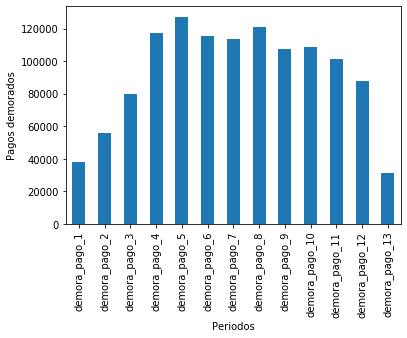

In [55]:
(df[[col for col in df.columns if "demora_pago" in col]] > 0).sum().plot.bar().set(xlabel="Periodos", ylabel="Pagos demorados")

In [56]:
df[[col for col in df.columns if "demora_pago" in col]] = df[[col for col in df.columns if "demora_pago" in col]].fillna(999)

In [59]:
df[[col for col in df.columns if "MONTO_PAGO" in col]] = df[[col for col in df.columns if "MONTO_PAGO" in col]].fillna(0)

In [60]:
df.to_feather("../../data/processed/pagos_x_cif_id.feather")